**Assignment II** 

İbrahim Can Gençel
2166429

I have choosen **Prince_Prigio** From Andrew_Lang 

In [1]:
import pandas as pd
!pip install nltk 
!pip install contractions
import numpy as np

import csv
from collections import defaultdict
from nltk import download
download("popular") # Popular datasets
download('tagsets') # Tagsets for POS tagging
import re
from collections import Counter
from nltk.corpus import stopwords
download('stopwords')

import torch
import torch.utils.data as tud
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

     |████████████████████████████████| 327kB 10.4MB/s 
     |████████████████████████████████| 286kB 44.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85393 sha256=5dea6eb6d48f101dbe83b932e303149dd3f41ad0c7920277fa065eea3a33301b
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading pac

In [2]:
# This code opens cbt test file and reads the book till next book. And convert it to a dataframe before converting, deletes the uppercase words
# because they are vchapter titles.
a = 0
dataframe = pd.DataFrame()
L = []
filename = "/content/drive/MyDrive/IS784_Labs/cbt_test.txt"
with open(filename,'r') as fin:
    text = fin.read()

# In order to read only first book.
text = text.partition("_BOOK_TITLE_ : Lewis_Carroll___Alice's_Adventures_in_Wonderland.txt.out")[0]

#Delete punctuatiıons
text = re.sub(r'[^\w\s]', '', text)

# IN order to delete first books title
text = text.split("PARTNERSHIP")[1]

In order to delete chapter titles, I have deleted uppercase words, which also deleted I, A which is good because they are stop words.

In [3]:
text = re.sub(r'\b[A-Z]+\b', '', text)

In [4]:
# It lowercase all the words.
text = text.lower()

# Basic tokenizer
text = text.split()

Delete stop words

In [5]:
all_stopwords = stopwords.words('english')

In [6]:
tokens_without_sw = [word for word in text if not word in all_stopwords]

#Building a Dictinoary

Total Number of Unique words

In [7]:
total_number_of_words = set(tokens_without_sw)
print(len(total_number_of_words))

5755


In [8]:
# I have choosen 5000 words because other words are very rarely
vocabularies = dict(Counter(tokens_without_sw).most_common(5000))

In [9]:
print(vocabularies)

{'said': 695, 'king': 470, 'one': 457, 'little': 399, 'prince': 354, 'could': 336, 'would': 293, 'came': 292, 'old': 276, 'went': 267, 'time': 246, 'princess': 227, 'day': 212, 'saw': 210, 'go': 208, 'man': 198, 'great': 197, 'must': 189, 'see': 189, 'come': 176, 'much': 171, 'away': 163, 'shall': 160, 'two': 156, 'found': 156, 'beautiful': 155, 'queen': 155, 'made': 151, 'back': 151, 'put': 150, 'like': 148, 'took': 146, 'asked': 143, 'way': 143, 'nt': 142, 'heard': 141, 'told': 141, 'night': 140, 'soon': 137, 'ring': 137, 'thought': 136, 'never': 136, 'long': 135, 'take': 131, 'daughter': 128, 'last': 127, 'upon': 125, 'get': 124, 'woman': 124, 'gave': 124, 'good': 122, 'first': 122, 'well': 120, 'till': 119, 'three': 118, 'home': 117, 'round': 116, 'bird': 110, 'youth': 109, 'wood': 108, 'mother': 108, 'nothing': 107, 'let': 105, 'witch': 105, 'left': 104, 'answered': 103, 'castle': 103, 'know': 102, 'palace': 102, 'girl': 99, 'give': 99, 'wife': 98, 'whole': 98, 'klaus': 98, 'water

In [10]:
# Taken from https://www.programmersought.com/article/62456133684/
word_counts = np.array([count for count in vocabularies.values()],dtype=np.float32)
word_freqs = word_counts/np.sum(word_counts)
word_freqs = word_freqs ** (3./4.)
word_freqs = word_freqs / np.sum(word_freqs)
VOCAB_SIZE = len(total_number_of_words)

# Subsampling

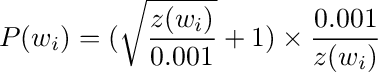

My model did not work well with subsampling therefore, I have commented it. ALSO I have deleted stop words already.

In [11]:

#updated_tokens = []
#total = 0
#for word in set(vocabularies):
#  prob = (np.sqrt(wordFreq[(word)]/0.001) + 1) * (0.001/wordFreq[word]])
  
#  if np.random.random() < prob*10:
#    updated_tokens.append(word)
#    total += 1

In [12]:
wordset = []
wordset = [word for word in tokens_without_sw]

Creating integer to word, word to integer

In [13]:
word_to_ix = {word: i for i, word in enumerate(wordset)}  # a dictionary that is similar to torchtext's stoi function
ix_to_word = {ix:word for ix, word in enumerate(wordset)} # a dictionary that is similar to torchtext's itos function

print('word to ix converts word to numbers: word_to_ix["cat"] ->', word_to_ix["cat"])
print("ix to word converts word to numbers: ix_to_word[28] ->", ix_to_word[28])

word to ix converts word to numbers: word_to_ix["cat"] -> 38416
ix to word converts word to numbers: ix_to_word[28] -> mouse


# Negative Sampling

In [14]:
pos_words0_list = []
pos_words1_list = []
neg_words0_list = []
neg_words1_list = []
neg_words2_list = []
neg_words3_list = []
neg_words4_list = []
neg_words5_list = []
neg_words6_list = []
neg_words7_list = []
neg_words8_list = []
neg_words9_list = []
center_word_list = []

In [15]:
# This is taken from the https://www.programmersought.com/article/62456133684/

BATCH_SIZE = 128 # the batch size
K = 10 # number of negative samples
C = 1 # nearby words threshold
# Implement Dataloader¶
# A dataloader needs the following:

# Encode all text into numbers, and then use subsampling to preprocess the text.
# Save vocabulary, word count, normalized word frequency
# Each iteration sample has a central word
# Return context words according to the current central word
# Some negative words according to the head word sample
# Return the counts of words
# With dataloader, we can easily randomly shuffle the entire data set, get a batch of data and so on.
class WordEmbeddingDataset(tud.Dataset):
    def __init__(self,text,word_to_idx,idx_to_word,word_freqs,word_counts):
        ''' text: a list of words, all text from the training dataset
            word_to_idx: the dictionary from word to idx
            idx_to_word: idx to word mapping
            word_freq: the frequency of each word
            word_counts: the word counts
        '''
        super(WordEmbeddingDataset,self).__init__()
        # Replace all words in the text article with the number in the dictionary, get() function, set the default value
        self.text_encoded = [word_to_ix.get(t,VOCAB_SIZE-1) for t in text]
        # Convert variables of numpy type to tensor type
        self.text_encoded = torch.Tensor(self.text_encoded).long()
        self.word_to_idx = word_to_idx
        self.idx_to_word = idx_to_word
        #Record the frequency of dictionary words to tensor type
        self.word_freqs = torch.Tensor(word_freqs)
        #Record the number of occurrences of dictionary words to tensor type
        self.word_counts = torch.Tensor(word_counts)
    def __len__(self):
        ''' returns the length of the entire data set (all words)
        '''
        return len(self.text_encoded)
    def __getitem__(self,idx):
        ''' This function returns the following data for training
                         -Headword
                         -(Positive) words near this word
                         -K randomly sampled words as negative sample
        '''
        #Find the position of the central word in the text eq. love is 4.
        center_word = self.text_encoded[idx]
        # Find the positive sample near the central word in the text, where C = 3. There are 2*C positive samples
        pos_indices = list(range(idx-C,idx)) + list(range(idx+1,idx+C+1))
        # If the central word is at the beginning or end, then we turn the negative number to the end or beginning of text. eq -1%10 = 9
        pos_indices = [ i%len(self.text_encoded) for i in pos_indices]
        #Find the number of the central word corresponding to the positive word in the dictionary
        pos_words = self.text_encoded[pos_indices]
        #Find the number of the neutral word corresponding to the negative word in the dictionary
        neg_words = torch.multinomial(self.word_freqs, K * pos_words.shape[0], True)
        #Return the number of the central word, postive samples and negative samples
        center_word_list.append(ix_to_word[int(center_word)])
        pos_words0_list.append(ix_to_word[int(pos_words[0])])
        pos_words1_list.append(ix_to_word[int(pos_words[1])])
        neg_words0_list.append(ix_to_word[int(neg_words[0])])
        neg_words1_list.append(ix_to_word[int(neg_words[1])])
        neg_words2_list.append(ix_to_word[int(neg_words[2])])
        neg_words3_list.append(ix_to_word[int(neg_words[3])])
        neg_words4_list.append(ix_to_word[int(neg_words[4])])
        neg_words5_list.append(ix_to_word[int(neg_words[5])])
        neg_words6_list.append(ix_to_word[int(neg_words[6])])
        neg_words7_list.append(ix_to_word[int(neg_words[7])])
        neg_words8_list.append(ix_to_word[int(neg_words[8])])
        neg_words9_list.append(ix_to_word[int(neg_words[9])])





        return center_word,pos_words,neg_words

dataset = WordEmbeddingDataset(wordset,word_to_ix,ix_to_word,word_freqs,word_counts)
#num_workers Use the number of processes, 0 is 1 process.
dataloader = tud.DataLoader(dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=0)
ab = 0
for i,(input_labels,pos_labels,neg_labels) in enumerate(dataloader):
  ab = ab+1


In [16]:
print(wordset)

['cat', 'made', 'acquaintance', 'mouse', 'spoken', 'much', 'great', 'love', 'friendship', 'felt', 'last', 'mouse', 'consented', 'live', 'house', 'go', 'shares', 'housekeeping', 'must', 'provide', 'winter', 'else', 'shall', 'suffer', 'hunger', 'said', 'cat', 'little', 'mouse', 'venture', 'everywhere', 'case', 'run', 'last', 'trap', 'good', 'counsel', 'followed', 'little', 'pot', 'fat', 'bought', 'know', 'put', 'length', 'long', 'consultation', 'cat', 'said', 'know', 'place', 'could', 'better', 'put', 'church', 'one', 'trouble', 'take', 'away', 'hide', 'corner', 'wo', 'nt', 'touch', 'till', 'want', 'little', 'pot', 'placed', 'safety', 'long', 'cat', 'great', 'longing', 'said', 'mouse', 'wanted', 'tell', 'little', 'mouse', 'cousin', 'little', 'son', 'white', 'brown', 'spots', 'wants', 'godmother', 'let', 'go', 'today', 'take', 'care', 'house', 'alone', 'yes', 'go', 'certainly', 'replied', 'mouse', 'eat', 'anything', 'good', 'think', 'much', 'like', 'drop', 'red', 'christening', 'wine', 'u

# Converting Lists to CSV File

Dataset is saved as csv file type with name = dataset.csv
New dataset with target_word, center_word and output is exported as **dataset_new.csv**

In [17]:
with open('dataset.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Center_Word", "Pos_Word1", "Pos_Word2","Neg_Word1","Neg_Word2","Neg_Word3","Neg_Word4","Neg_Word5",
                     "Neg_Word6","Neg_Word7","Neg_Word8","Neg_Word9","Neg_Word10"])
    for i in range(len(center_word_list)):
      writer.writerow([center_word_list[i], pos_words0_list[i], pos_words1_list[i], neg_words0_list[i], neg_words1_list[i], neg_words2_list[i], neg_words3_list[i], neg_words4_list[i],neg_words5_list[i], neg_words6_list[i], neg_words7_list[i], neg_words8_list[i], neg_words9_list[i]])

Creating new dataframe and csv file

In [18]:
df = pd.read_csv('/content/dataset.csv')
center_words_first = df.iloc[:,:1]
pos_words1 = df.iloc[:,1:2]
neg_words_list1 = df.iloc[:,3:8]
pos_words2 = df.iloc[:,2:3]
neg_words_list2 = df.iloc[:,8:]

new_df_first = pd.concat([center_words_first, pos_words1.rename(columns={'Pos_Word1':'Target_Word'}), neg_words_list1], axis = 1)
new_df_second = pd.concat([center_words_first, pos_words2.rename(columns={'Pos_Word2':'Target_Word'}), neg_words_list2.rename(columns={'Neg_Word6':'Neg_Word1',
                                                                                                                'Neg_Word7':'Neg_Word2',
                                                                                                                'Neg_Word8':'Neg_Word3',
                                                                                                                'Neg_Word9':'Neg_Word4',
                                                                                                                'Neg_Word10':'Neg_Word5',})], axis = 1)
new_df = pd.concat([new_df_first,new_df_second], ignore_index=True)
new_df.to_csv(r'dataset_new.csv', index = False, sep = ',')

Visualize dataframe which is converted to CSV file

In [19]:
print(new_df)

      Center_Word   Target_Word Neg_Word1  ...   Neg_Word3 Neg_Word4  Neg_Word5
0        bitterly          wept       red  ...  displeased      till   princess
1        followed         whale  executed  ...         see     mouse   answered
2        bracelet          neck     three  ...        hard     drops  glittered
3             man  gauntlooking      want  ...     sitting     lying      threw
4        princess      question      show  ...         yes    length      waste
...           ...           ...       ...  ...         ...       ...        ...
97795     scolded         woman      lips  ...       worse      said     length
97796        even         blind     eagle  ...       mouse       put    counsel
97797      things            nt     herbs  ...      looked       cat  godmother
97798         row       brother    turned  ...        game  overtake       eyes
97799   statesmen       already      rose  ...        fish      good       said

[97800 rows x 7 columns]


# Create a Dataset for Model


In [20]:
new_dataframe = pd.read_csv('/content/dataset_new.csv')

This model returns the center_word's integer value, target_word's integer value and output value 1-> positive example 0-> negative example


In [21]:
class MyDataset(tud.Dataset):
    def __init__(self,new_dataframe, word_to_ix):
        super(MyDataset,self).__init__()
        self.new_dataframe = new_dataframe
    def __len__(self):
        return len(self.new_dataframe["Center_Word"].tolist())
    def __getitem__(self,idx):
        neg_word_integer = []
        center_word_integer = word_to_ix[self.new_dataframe["Center_Word"].iloc[idx]]
        positive_word_integer = (word_to_ix[self.new_dataframe['Target_Word'].iloc[idx]])
        neg_word_integer.append(word_to_ix[self.new_dataframe['Neg_Word1'].iloc[idx]])
        neg_word_integer.append(word_to_ix[self.new_dataframe['Neg_Word2'].iloc[idx]])
        neg_word_integer.append(word_to_ix[self.new_dataframe['Neg_Word3'].iloc[idx]])
        neg_word_integer.append(word_to_ix[self.new_dataframe['Neg_Word4'].iloc[idx]])
        neg_word_integer.append(word_to_ix[self.new_dataframe['Neg_Word5'].iloc[idx]])
        
        return center_word_integer, positive_word_integer, torch.IntTensor(neg_word_integer)

# Dataloader and Train-Test Split

In [22]:
dataset = MyDataset(new_dataframe, word_to_ix)
length_of_dataset = len(new_dataframe["Center_Word"].tolist())
train_length = int(0.6*length_of_dataset)
valid_length = int(0.2*length_of_dataset)
test_length = int(length_of_dataset - train_length - valid_length)
train_set, valid_set, test_set = torch.utils.data.random_split(dataset, lengths = [train_length, valid_length, test_length]) 

In [23]:
BATCH_SIZE = 16

train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_set,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

# Model

Model is taken from https://github.com/blackredscarf/pytorch-SkipGram
And I editted it for using with 2 context words

In [24]:
vocab_size = (len(new_dataframe["Center_Word"]))

In [25]:
class SkipGramNeg(nn.Module):
    def __init__(self, vocab_size, emb_dim):
        super(SkipGramNeg, self).__init__()
        self.input_emb = nn.Embedding(vocab_size, emb_dim)
        self.output_emb = nn.Embedding(vocab_size, emb_dim)
        self.log_sigmoid = nn.LogSigmoid()

        initrange = (2.0 / (vocab_size + emb_dim)) ** 0.5  # Xavier init
        self.input_emb.weight.data.uniform_(-initrange, initrange)
        self.output_emb.weight.data.uniform_(-0, 0)


    def forward(self, target_input, context, neg):
        """
        :param target_input: [batch_size]
        :param context: [batch_size]
        :param neg: [batch_size, neg_size]
        :return:
        """
        # u,v: [batch_size, emb_dim]
        v = self.input_emb(target_input)
        u = self.output_emb(context)
        # positive_val: [batch_size]
        positive_val = self.log_sigmoid(torch.sum(u * v, dim=1)).squeeze()
        # u_hat: [batch_size, neg_size, emb_dim]
        u_hat = self.output_emb(neg)
        # [batch_size, neg_size, emb_dim] x [batch_size, emb_dim, 1] = [batch_size, neg_size, 1]
        # neg_vals: [batch_size, neg_size]
        neg_vals = torch.bmm(u_hat, v.unsqueeze(2)).squeeze(2)
        # neg_val: [batch_size]
        neg_val = self.log_sigmoid(-torch.sum(neg_vals, dim=1)).squeeze()

        loss = positive_val + neg_val
        return -loss.mean()

    def predict(self, inputs):
        return self.input_emb(inputs)

Model is created and it is converted to cuda for using GPU power

In [26]:
model = SkipGramNeg(vocab_size,100)
model.cuda()

SkipGramNeg(
  (input_emb): Embedding(97800, 100)
  (output_emb): Embedding(97800, 100)
  (log_sigmoid): LogSigmoid()
)

Optimizer

In [27]:
optimizer = optim.SGD(model.parameters(), lr=0.3)

# Training

In [28]:
!mkdir models

In the training process, with the help of validation set, I have recorded best parameters in the epoch which has minimum validation loss

In [29]:
initial_valid_loss = 1000000
models_dir = '/content/models/'
train_loss_ = []
valid_loss_ = []
for epoch in range(25):
  loss_list = []
  print("epoch" + str(epoch))
  for i, (target_inputs, context,neg) in enumerate(train_loader):
    neg = neg.cuda()
    optimizer.zero_grad()
    target_inputs = target_inputs.cuda()
    context = context.cuda()
    loss_mean = model(target_inputs, context, neg)
    loss_list.append(loss_mean)
    loss_mean.backward()
    optimizer.step()



  valid_loss_list = []
  with torch.no_grad():
    
    for i, (target_inputs, context,neg) in enumerate(valid_loader):
      neg = neg.cuda()
      target_inputs = target_inputs.cuda()
      context = context.cuda()
      valid_loss_mean = model(target_inputs, context, neg)
      valid_loss_list.append(valid_loss_mean)
    valid_loss_best = (sum(valid_loss_list)/len(valid_loss_list))
    if valid_loss_best < initial_valid_loss:
      initial_valid_loss = valid_loss_best
      # Saving model code is taken from -> https://pytorch.org/tutorials/beginner/saving_loading_models.html
      checkpoint = {'model': model,
                            'state_dict': model.state_dict(),
                            'optimizer' : optimizer.state_dict()}

      torch.save(checkpoint, models_dir + '{}.pth'.format(epoch))
      best_epoch_number = epoch
  train_loss_now = (sum(loss_list)/len(loss_list))
  valid_loss_now = (sum(valid_loss_list)/len(valid_loss_list)) 
  train_loss_.append(train_loss_now)
  valid_loss_.append(valid_loss_now)
  print("Epoch: {}, Training Loss : {}, Validation Loss: {}".format(str(epoch), str(train_loss_now), str(valid_loss_now)) )


epoch0
Epoch: 0, Training Loss : tensor(1.3746, device='cuda:0', grad_fn=<DivBackward0>), Validation Loss: tensor(1.2885, device='cuda:0')
epoch1
Epoch: 1, Training Loss : tensor(1.1061, device='cuda:0', grad_fn=<DivBackward0>), Validation Loss: tensor(1.0028, device='cuda:0')
epoch2
Epoch: 2, Training Loss : tensor(0.9566, device='cuda:0', grad_fn=<DivBackward0>), Validation Loss: tensor(0.9357, device='cuda:0')
epoch3
Epoch: 3, Training Loss : tensor(0.9029, device='cuda:0', grad_fn=<DivBackward0>), Validation Loss: tensor(0.9009, device='cuda:0')
epoch4
Epoch: 4, Training Loss : tensor(0.8703, device='cuda:0', grad_fn=<DivBackward0>), Validation Loss: tensor(0.8770, device='cuda:0')
epoch5
Epoch: 5, Training Loss : tensor(0.8453, device='cuda:0', grad_fn=<DivBackward0>), Validation Loss: tensor(0.8578, device='cuda:0')
epoch6
Epoch: 6, Training Loss : tensor(0.8237, device='cuda:0', grad_fn=<DivBackward0>), Validation Loss: tensor(0.8409, device='cuda:0')
epoch7
Epoch: 7, Training L

# Training and Validation Loss

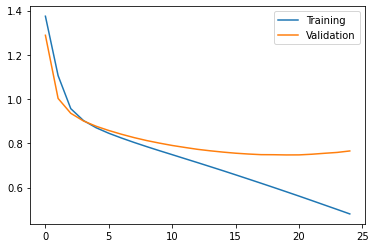

In [30]:
plt.plot(range(25), train_loss_, label='Training')
plt.plot(range(25), valid_loss_, label='Validation')
plt.legend()

I am SATISFIED with the graph:)

# Bonus

In [31]:
# This cell is taken from : https://pytorch.org/tutorials/beginner/saving_loading_models.html?highlight=eval
def load_best_model(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    
    return model.eval()


filepath = models_dir + str(best_epoch_number) + ".pth"
best_model = load_best_model(filepath)

# Test Process

In [32]:
test_loss_list = []
with torch.no_grad():
  
  for i, (target_inputs, context,neg) in enumerate(test_loader):
    neg = neg.cuda()
    target_inputs = target_inputs.cuda()
    context = context.cuda()
    test_loss_mean = best_model(target_inputs, context, neg)
    test_loss_list.append(test_loss_mean)
  valid_loss_best = (sum(test_loss_list)/len(test_loss_list))
print("Training Loss :" + str(sum(test_loss_list)/len(test_loss_list)))

Training Loss :tensor(0.7471, device='cuda:0')


# Bonus Part

In [41]:
king = word_to_ix['king']
king = (torch.LongTensor([king]))

queen = word_to_ix['queen']
queen = (torch.LongTensor([queen]))

cat = word_to_ix['cat']
cat = torch.LongTensor([cat])

In [42]:
king = king.cuda()
king_vector = best_model.predict(king)

queen = queen.cuda()
queen_vector = best_model.predict(queen)

cat = cat.cuda()
cat_vector = best_model.predict(cat)

In [43]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
output = cos(king_vector, queen_vector)
output2 = cos(cat_vector, queen_vector)

In [44]:
print("Similarity between Queen and King :" + str(output))
print("Similarity between Queen and Cat :" + str(output2))

Similarity between Queen and King :tensor([0.6496], device='cuda:0')
Similarity between Queen and Cat :tensor([0.0490], device='cuda:0')
